<a href="https://www.kaggle.com/code/saksham177/fork-of-cardekho-car-price-eda?scriptVersionId=183368354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Car Dekho Used Car Price Exploratory Data Analysis**

## 1) Introduction
The analysis aims to explore a dataset of used cars to uncover insights about the factors influencing their selling prices. Understanding the dynamics of the used car market is crucial for both buyers and sellers to make informed decisions.

In [1]:
import os
import pandas as pd

# Directory path where the dataset is located
directory_path = '/kaggle/input/cardekho-used-car-data'

# List files in the directory to find the CSV file name
files = os.listdir(directory_path)
print(files)

# Assuming the file name is 'cardekho_dataset.csv', update the file path
file_path = os.path.join(directory_path, 'cardekho_dataset.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

['cardekho_dataset.csv']


## 2) Understanding the data & data description

Data Description (Feature Info)-->


car_name: Car's Full name, which includes brand and specific model name.

brand: Brand Name of the particular car.

model: Exact model name of the car of a particular brand.

seller_type: Which Type of seller is selling the used car

fuel_type: Fuel used in the used car, which was put up on sale.

transmission_type: Transmission used in the used car, which was put on sale.

vehicle_age: The count of years since car was bought.

mileage: It is the number of kilometer the car runs per litre.

engine: It is the engine capacity in cc(cubic centimeters)

max_power: Max power it produces in BHP.

seats: Total number of seats in car.

selling_price: The sale price which was put up on website.

In [2]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## 3) Data Cleaning and Preprocessing

In [3]:
from pprint import pprint

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataframe:")
pprint(df.head())

# Display dataframe information
print("\nDataframe information:")
pprint(df.info())

# Display the number of missing values in each column
print("\nNumber of missing values in each column:")
pprint(df.isnull().sum())

# Check if 'Unnamed: 0' column exists before attempting to drop it
if 'Unnamed: 0' in df.columns:
    # Drop the 'Unnamed: 0' column as it is not needed
    df = df.drop(columns=['Unnamed: 0'])

# Handle missing values by dropping rows with any missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Standardize text data by converting to lowercase
df['fuel_type'] = df['fuel_type'].str.lower()
df['seller_type'] = df['seller_type'].str.lower()
df['transmission_type'] = df['transmission_type'].str.lower()

# Remove outliers in 'selling_price' using IQR method
q1 = df['selling_price'].quantile(0.25)
q3 = df['selling_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)]

# Display cleaned dataframe information and summary statistics
print("\nCleaned dataframe information:")
pprint(df.info())

print("\nSummary statistics of numerical columns:")
pprint(df.describe())

# Display the first 5 rows of the cleaned dataframe
print("\nFirst 5 rows of the cleaned dataframe:")
pprint(df.head())


First 5 rows of the dataframe:
   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  

## **4) Exploratory Data Analysis (EDA)**

### 4.1) Univariate Analysis

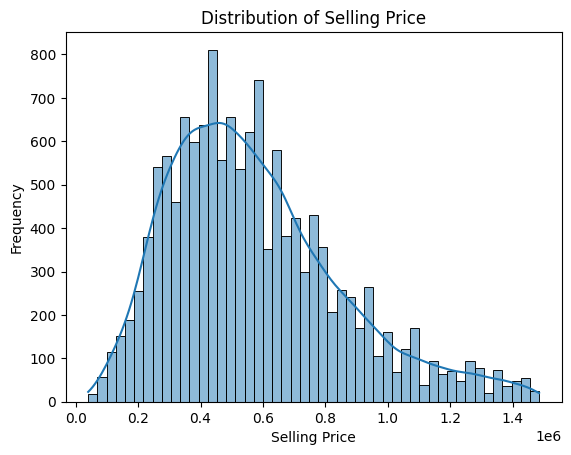

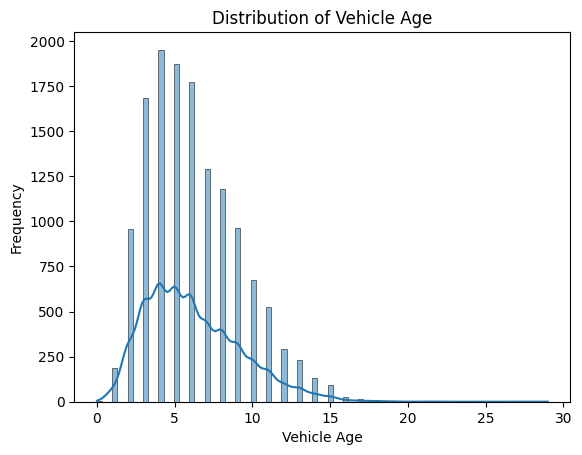

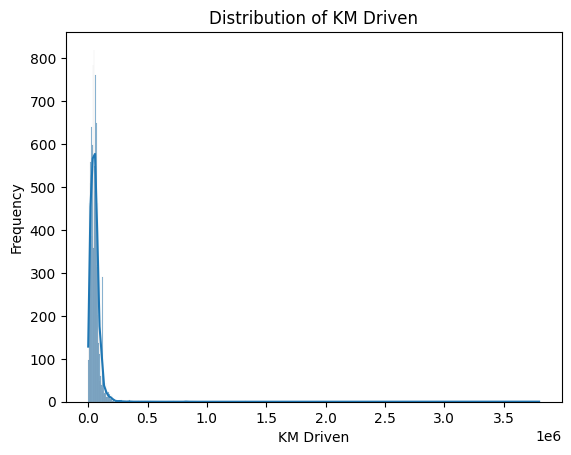

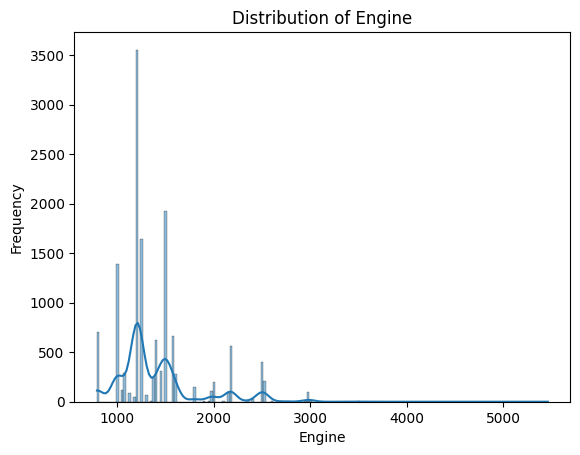

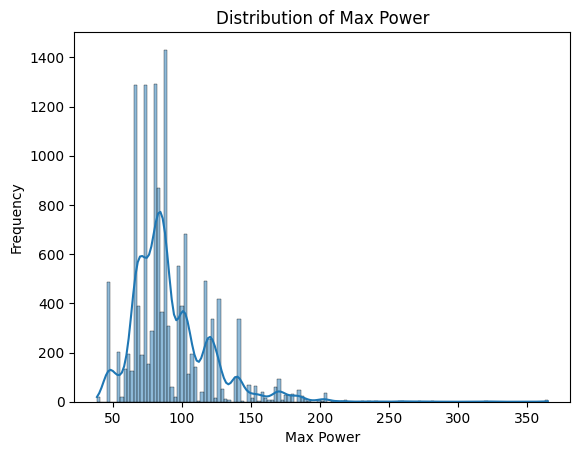

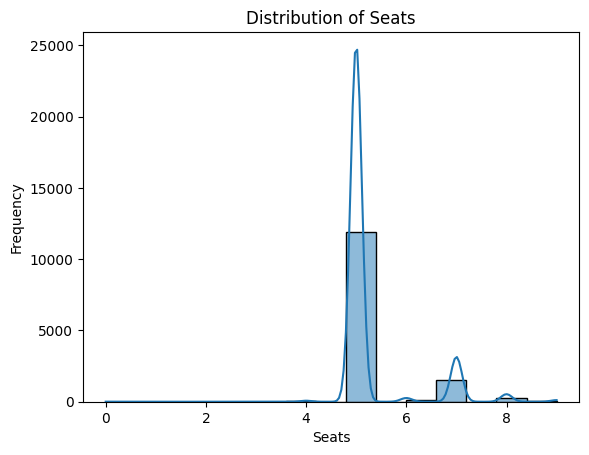

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Distribution of selling price
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()
print("\n")
print("\n")
# Distribution of vehicle age
sns.histplot(df['vehicle_age'], kde=True)
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.show()
print("\n")
print("\n")
# Distribution of km driven
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution of KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Frequency')
plt.show()
print("\n")
print("\n")
# Distribution of engine
sns.histplot(df['engine'], kde=True)
plt.title('Distribution of Engine')
plt.xlabel('Engine')
plt.ylabel('Frequency')
plt.show()
print("\n")
print("\n")
# Distribution of max power
sns.histplot(df['max_power'], kde=True)
plt.title('Distribution of Max Power')
plt.xlabel('Max Power')
plt.ylabel('Frequency')
plt.show()
print("\n")
print("\n")
# Distribution of seats
sns.histplot(df['seats'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()
print("\n")


### 4.2) Bivariate Analysis

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


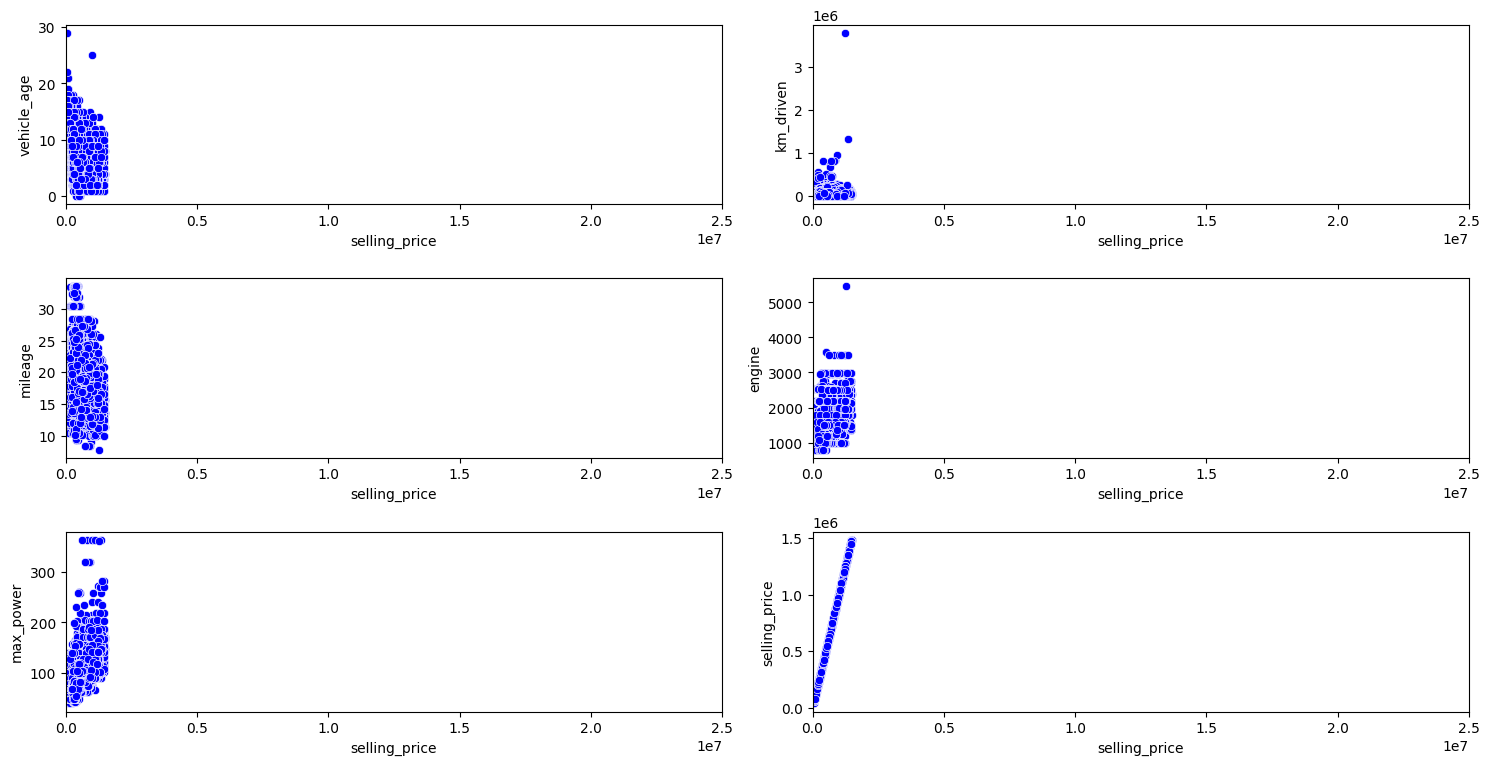

In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000)
    plt.tight_layout()

### 4.3) Categorical Variable Analysis

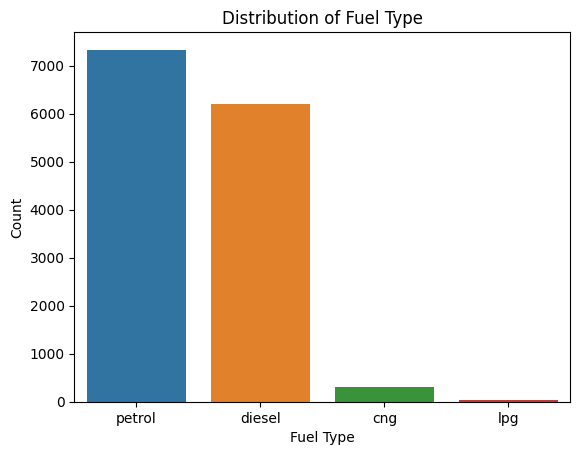

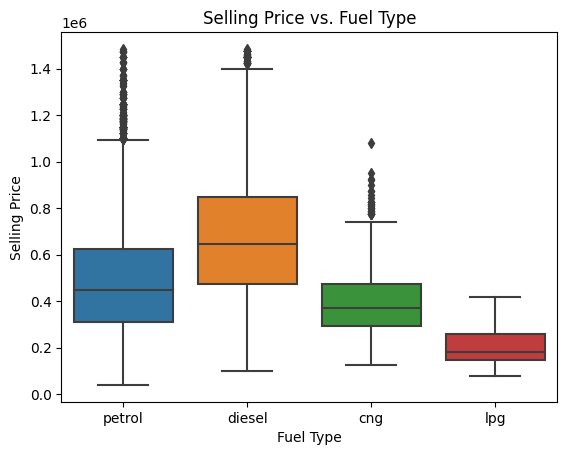

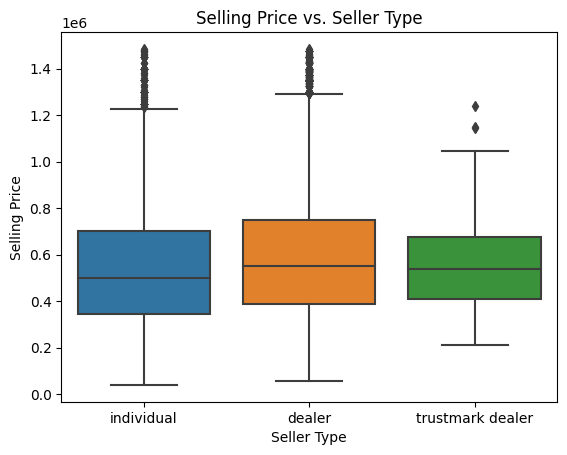

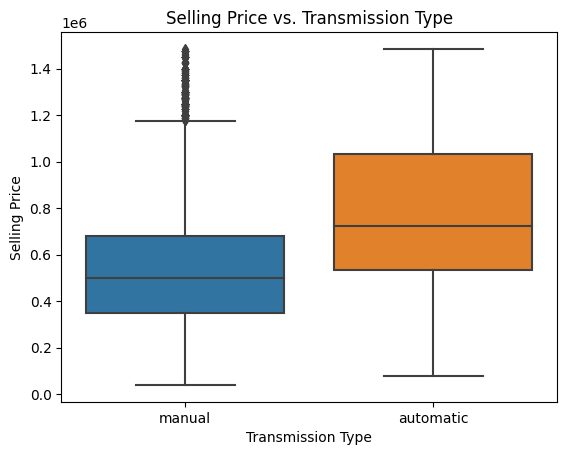

In [6]:
# Distribution of fuel type
sns.countplot(x='fuel_type', data=df)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()
print("\n")
# Boxplot of selling price vs. fuel type
sns.boxplot(x='fuel_type', y='selling_price', data=df)
plt.title('Selling Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()
print("\n")
# Boxplot of selling price vs. seller type
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Selling Price vs. Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()
print("\n")
# Boxplot of selling price vs. transmission type
sns.boxplot(x='transmission_type', y='selling_price', data=df)
plt.title('Selling Price vs. Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

### 4.4) Correlation Analysis

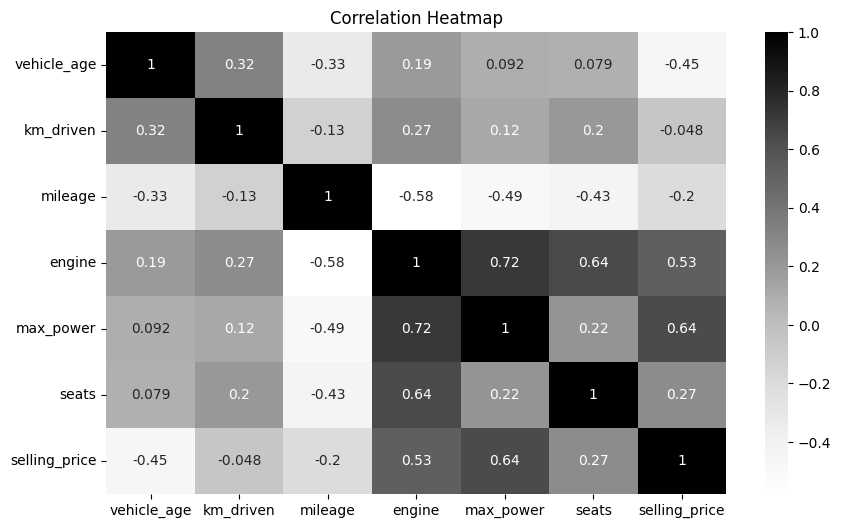

In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
print("\n")
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greys')
plt.title('Correlation Heatmap')
plt.show()

## **5) Insights from Data Visualization**

### 5.1) Selling Price Distribution (Target Feature Distribution)


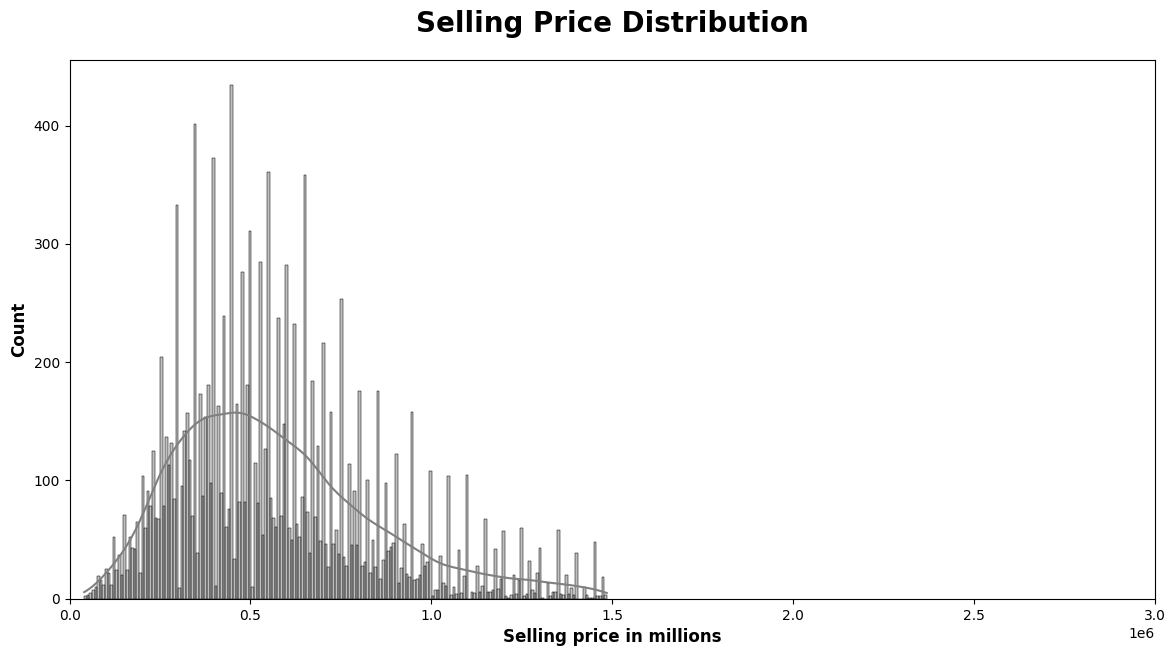

In [8]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'grey')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

### 5.2) Most Sold Cars on CarDekho Website


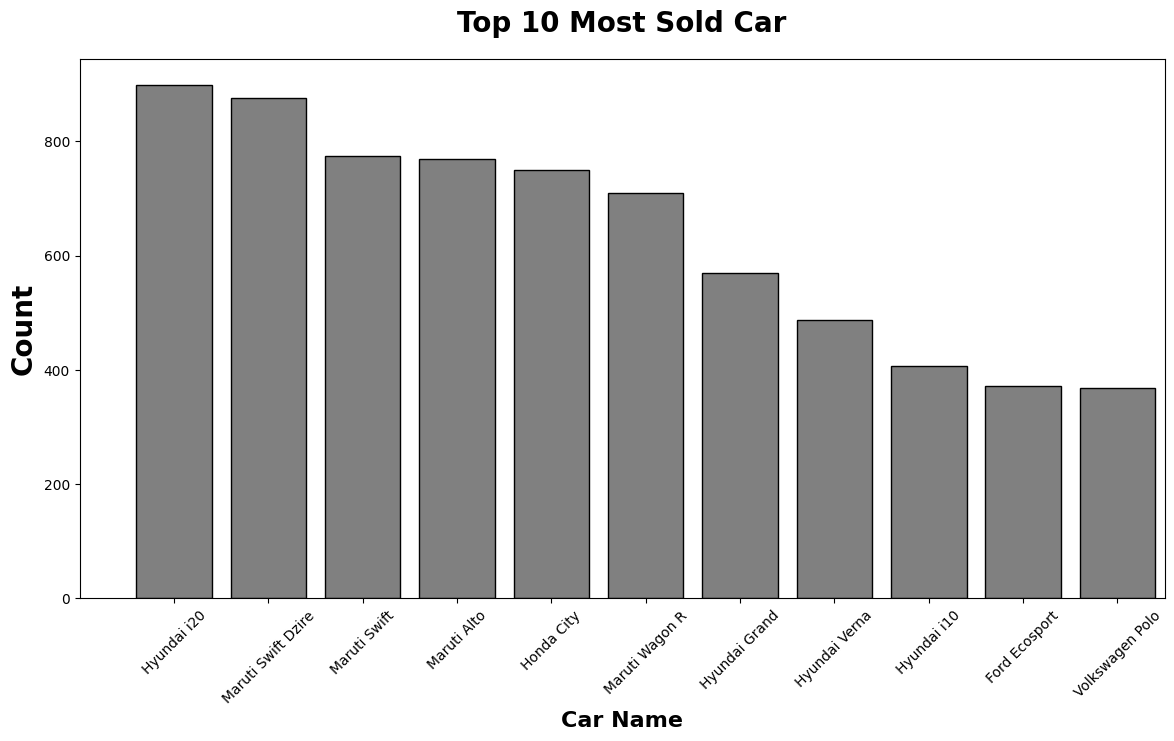

In [9]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="car_name", data=df, ec="black", color="grey", order=df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.xlim(-1, 10.5)
plt.show()

### 5.3) Most Costly Brand

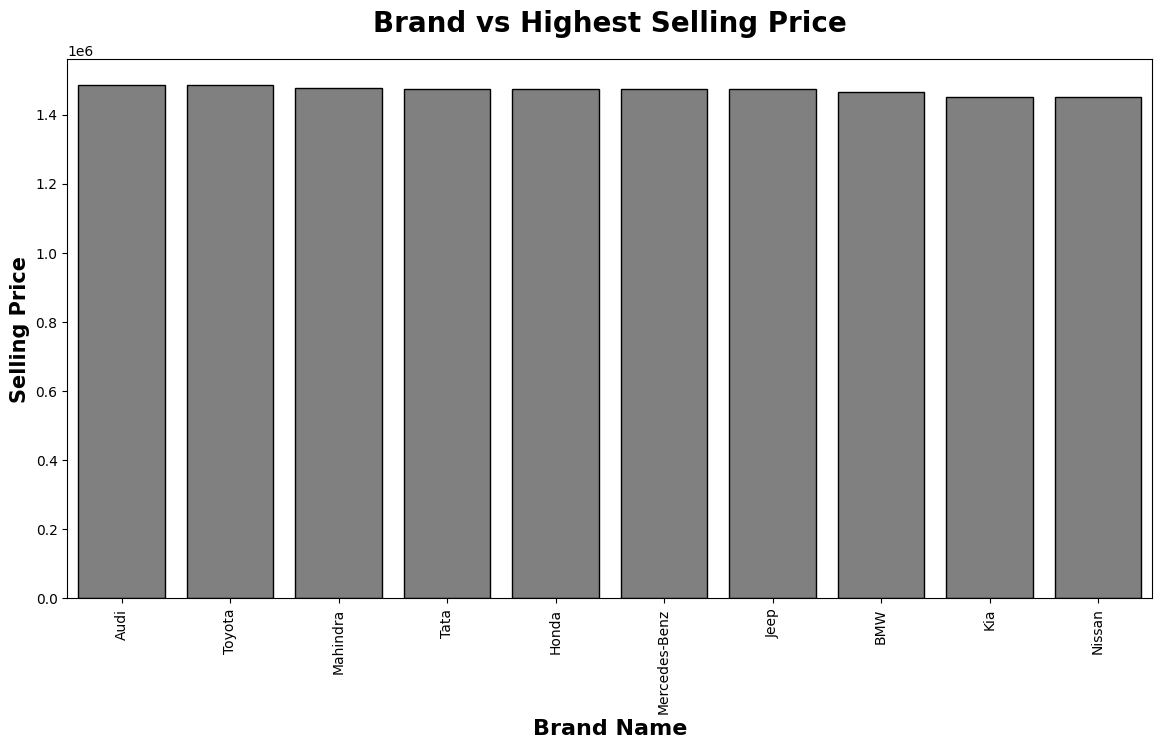

In [10]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",color="grey")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

### 5.4) Kilometers Driven Vs Selling Price


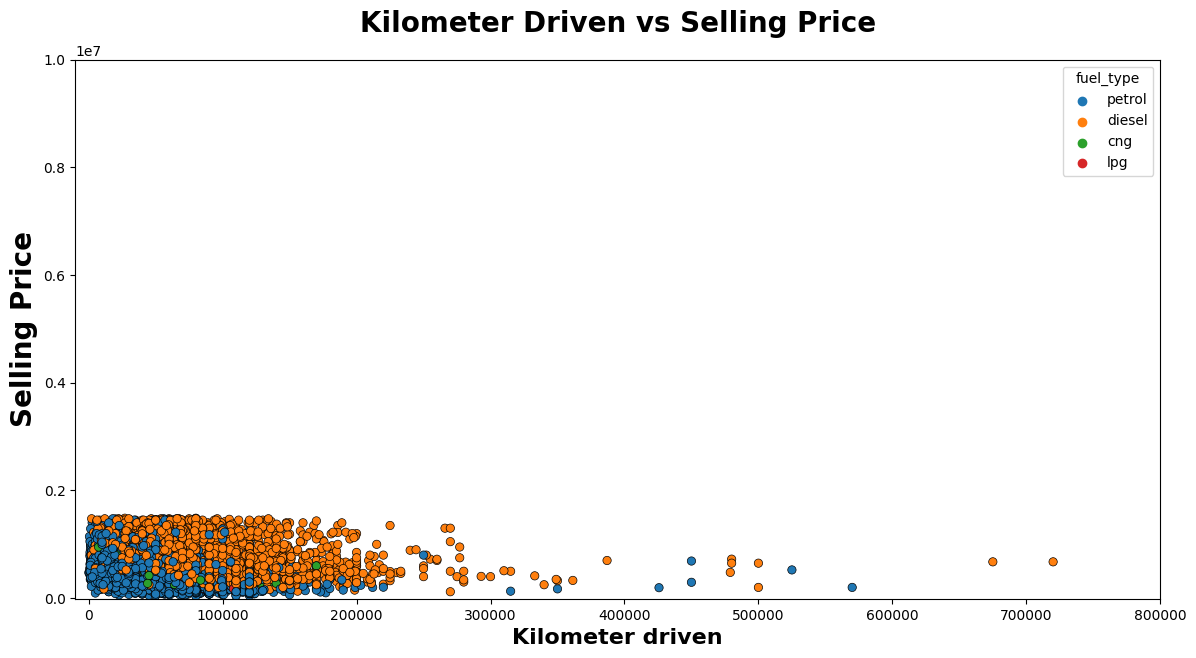

In [11]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "black",color='grey', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

### 5.5) Vehicle Age vs Selling Price


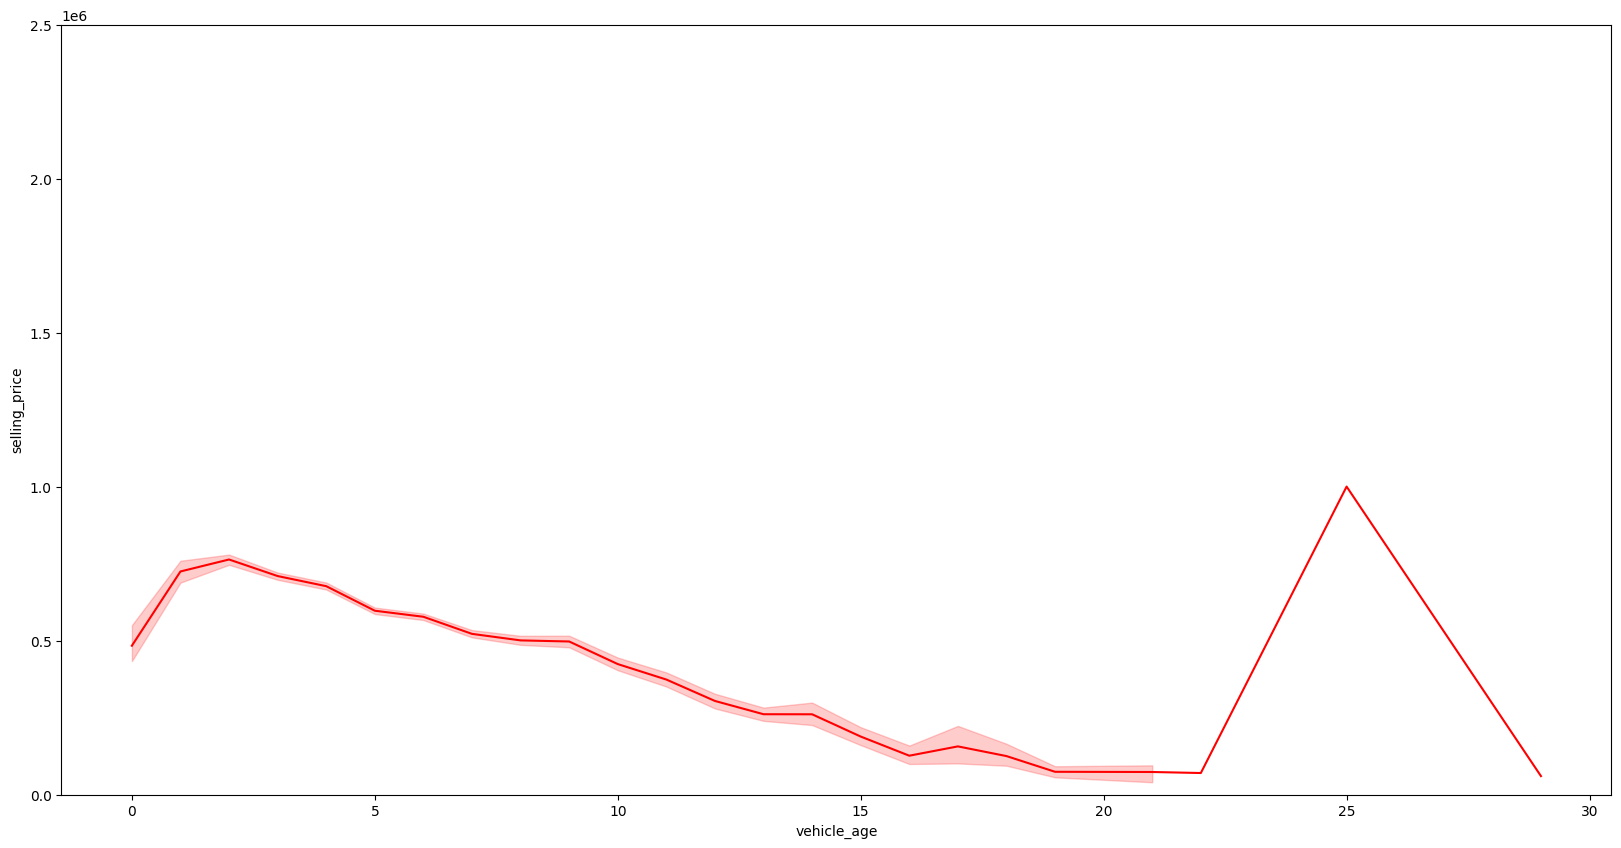

In [12]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='red')
plt.ylim(0,2500000)
plt.show()

### 5.6) Seller Type vs Selling Price


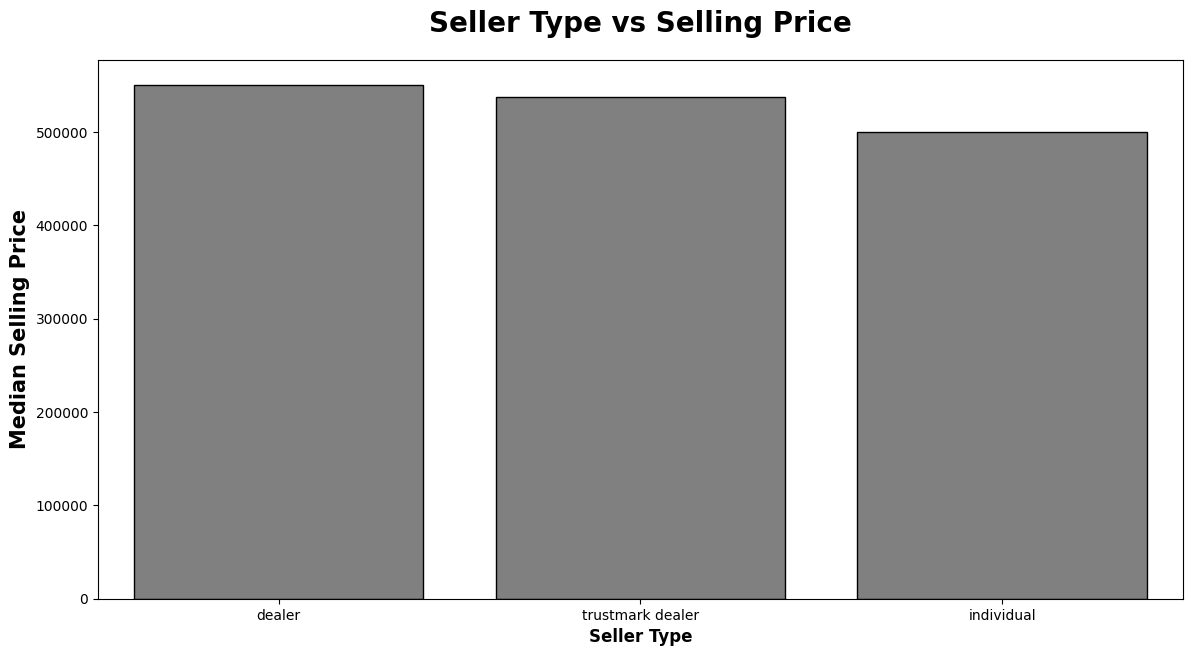

In [13]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", color="grey")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

## **6) Model Building and Evaluation**

In [14]:


df.head()
df_model=df.copy()
df_model.drop(labels=['car_name','brand','model'],axis=1,inplace=True)
df_model=pd.get_dummies(df_model,dtype=float)
df_model
df_model.dtypes
X=df_model.drop('selling_price',axis=1)      # Feature Matrix
X
y=df_model['selling_price']    # Target Variable
y


0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 13873, dtype: int64

ExtraTreesRegressor()
--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[2.88705040e-01 6.21437482e-02 5.79498014e-02 1.31700446e-01
 2.55250289e-01 2.29061098e-02 4.98274183e-03 5.52973510e-03
 2.57329860e-04 5.01950901e-04 8.12981277e-02 2.11978037e-05
 7.79067270e-03 4.23282928e-02 3.86345170e-02]


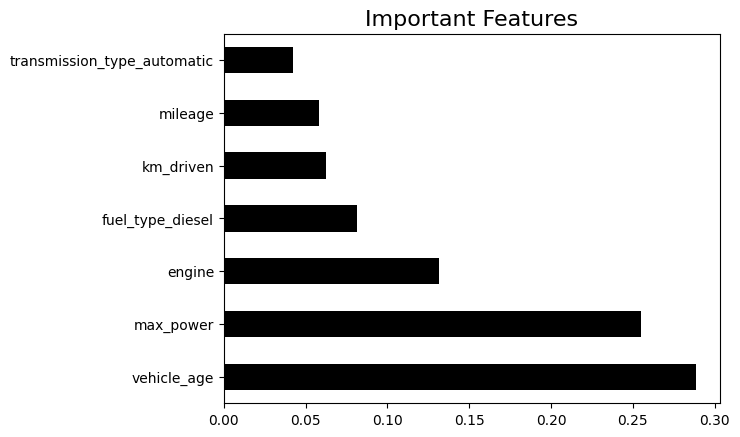

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
print(model.fit(X,y))
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='black')
plt.title('Important Features', fontsize=16)
plt.show()

## **7) Conclusion**

### **7.1) Key Findings and Insights from the Analysis :**


1. Distribution of Selling Price:   
*   The selling prices of used cars show a right-skewed distribution, indicating most cars are priced at the lower end, with fewer cars at the higher end.
*   The median selling price provides a good central tendency measure given the skewness.


2.   Vehicle Age and Kilometers Driven:

*   Older vehicles tend to have lower selling prices due to depreciation over time. Most vehicles in the dataset are within the 5-10 year age range.

* There is a negative correlation between kilometers driven and selling price, with higher mileage cars typically being cheaper. Most cars have been driven between 20,000 and 100,000 kilometers.



3.   Fuel Type:


*   Petrol cars tend to have lower selling prices compared to diesel cars, likely due to diesel's higher fuel efficiency and longer lifespan.
*   CNG and LPG cars are less common and generally priced lower, reflecting their niche market and possibly lower demand.


4.   Seller Type:


*   Cars sold by dealers generally have higher prices compared to those sold by individuals, potentially due to additional services, warranties, or assurances provided by dealers.
*   Individual sellers have a wider range of prices, suggesting more variability in the conditions and histories of the cars.



5.   Transmission Type:


*   Manual transmission cars are more common and generally cheaper than automatic transmission cars, reflecting market preferences and the higher cost of automatic cars.
* Automatic cars, though fewer, tend to command higher prices due to their convenience and newer technology.   


6.   Correlation Analysis:



*   The highest positive correlation with selling price is seen with engine size and max power, indicating that higher-powered and larger engine cars tend to be more expensive.
*   Vehicle age and kilometers driven have a strong negative correlation with selling price, confirming the depreciation effect.

### **7.2) Possible Recommendations for Buyers/Sellers Based on the Analysis :**


1.   For Buyers:


*  Consider buying from individual sellers to potentially find better deals, but be prepared to thoroughly inspect the car and verify its history.
*   If fuel efficiency and long-term use are priorities, look for diesel cars, but be aware of the higher upfront cost.
*   Older cars with high mileage can be good budget options but ensure they are well-maintained to avoid future repair costs.



2.   For Sellers:


*   If selling a diesel car, highlight its fuel efficiency and longevity as key selling points to justify a higher price.
*   Providing a well-maintained service record can help in selling older cars at a better price.
*   Cars with automatic transmissions can be marketed at a premium due to their convenience and technology features.



